In [354]:
%run -n main.py
%matplotlib inline

In [341]:
data = read_xls_data()

In [342]:
data.head()

,name,title,dosage,firm,amount,price,price2,id,code2,date,code1
0,None,Кагоцел,"таблетки 12 мг, 10 шт. - упаковки ячейковые ко...","ООО ""НИАРМЕДИК ПЛЮС"" - Россия",10,164.98,NaN,Р N002027/01,4.605340e+12,2015-10-07,1808-Пр/10
1,None,Пирфотех 99mТc,лиофилизат для приготовления раствора для внут...,"ООО ""Диамед"" - Россия",5,1435.32,NaN,Р N000494/01,4.606223e+12,2015-10-07,1620-Пр/10
2,None,Технефит 99mTc,лиофилизат для приготовления раствора для внут...,"ООО ""Диамед"" - Россия",5,1617.84,NaN,ЛС-002365,4.606223e+12,2015-10-07,1620-Пр/10
3,None,Технефор 99mTc,лиофилизат для приготовления раствора для внут...,"ООО ""Диамед"" - Россия",5,1662.12,NaN,ЛС-002366,4.606223e+12,2015-10-07,1620-Пр/10
4,Абакавир,Зиаген,"раствор для приема внутрь 20 мг/мл, 240 мл - ф...",ГлаксоСмитКляйн Инк - Канада,1,2440.97,NaN,П N011612/02,4.607008e+12,2015-10-07,5344-Пр/10


In [343]:
max_prices = get_max_prices(data)

In [320]:
serps = load_serps()

In [321]:
not_found, no_forms, join = join_forms(serps, max_prices)

Было скачано 3181 из 3156 (что-то со времен удаляется из таблички). ~200 не нашлось, ~800 не имеют дозы, предполагаем, что для них нет цен. ~2100 лекаств в суммы имеют ~4000 дозировок. Не для всех дозировок удалось найти максимальные цены. Примерно 25% не нашлось. Из 20 000 строчек из исходной таблицы в объединении участвуют ~8000, не знаю, плохо это или нет. Возможно в исходной таблицы много мелкого всего.

In [322]:
no_matches = join_stats(serps, max_prices, not_found, no_forms, join)

Total: 3181
Not found: 179
No forms: 822
In join: 2180

Forms: 3999
Matches: 2872
Data coverage: 8198


Посмотрим что из себя представляют эти 25%. Видно, что часть действительно не получится объединить. А часть нужно кропотливо отлаживать

In [324]:
# show_no_matches(no_matches)

Проверим вручную что попадает в объединение. Формально всё вроде бы норм. Действительно ли 100мг/20мл равно 5мг/мл? Внутри встречается сильный разброс в максимальных ценах. Нужно будет это отображать

In [131]:
# show_join(join)

In [333]:
prices = load_prices()

In [334]:
stats = join_prices(join, prices)

Всего ~4000 дозировки как и раньше. 75% имеют известные максимальные цены. Совсем для немногих не удалось найти цены совсем. Для примерно 15% объединилась только часть цен.

In [335]:
no_join, partial_join = stats_stats(stats)

Titles: 2180
Forms: 3999
Joined forms: 2872
Clean join: 2376
No join 42
Partial join 441


Среди совсем необъединившихся есть корректные. Правда иногда нет максимальной цены с данным amount. Иногда у максимальной цены amount none, тоже забиваем

In [13]:
# show_no_join(no_join)

Среди частично объединённых тоже есть корректные. Часто требует долгая крапотливая настройка.

In [14]:
# show_partial_join(partial_join)

Всё выглядит нормально. Похоже максимальные цены не максимальные. Нужно ещё добавить надбавки. Иногда бывается что у Спутника в одну дозировку попадают цены с другой.

In [15]:
# show_stats(stats)

In [370]:
popular = get_titles_popularity(stats, top=100)

In [145]:
# shows_stats(filter_stats(stats, popular))

In [371]:
dump_stats(filter_stats(stats, popular))

# Корректировка в пограничных зонах

45.45: 75.9924, 45.46: 71.50858
454.54: 714.99142, 454.55: 625.00625


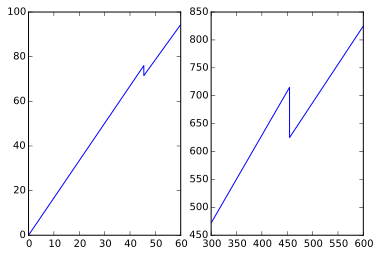

In [359]:
plot_steps()

454.54: 714.99142, 454.55: 714.99142


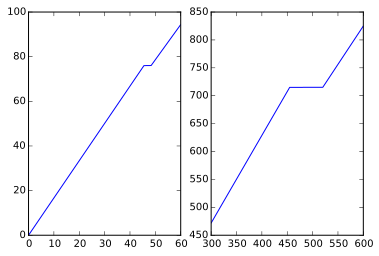

In [360]:
plot_steps(smooth=True)

In [365]:
%run -n main.py
dump_steps()